# Tree

Importing libraries to train AI

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

Read CSV file and encode each columns and clean them such aas remove na

In [134]:
data = pd.read_csv("bank.csv")
le = LabelEncoder()
data["pep"] = le.fit_transform(data["pep"])
data["sex"] = le.fit_transform(data["sex"])
data["region"] = le.fit_transform(data["region"])
data["married"] = le.fit_transform(data["married"])
data["car"] = le.fit_transform(data["car"])
data["save_act"] = le.fit_transform(data["save_act"])
data["current_act"] = le.fit_transform(data["current_act"])
data["mortgage"] = le.fit_transform(data["mortgage"])
data = data.dropna()
x = data.drop(["id","pep"],axis=1)
y = data["pep"]

Drop columns that are not needed and use pep for prediction

In [135]:
x = data.drop(["id","pep"],axis=1)
y = data["pep"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

Predicting and assessing the accuracy using Decision Tree

In [136]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

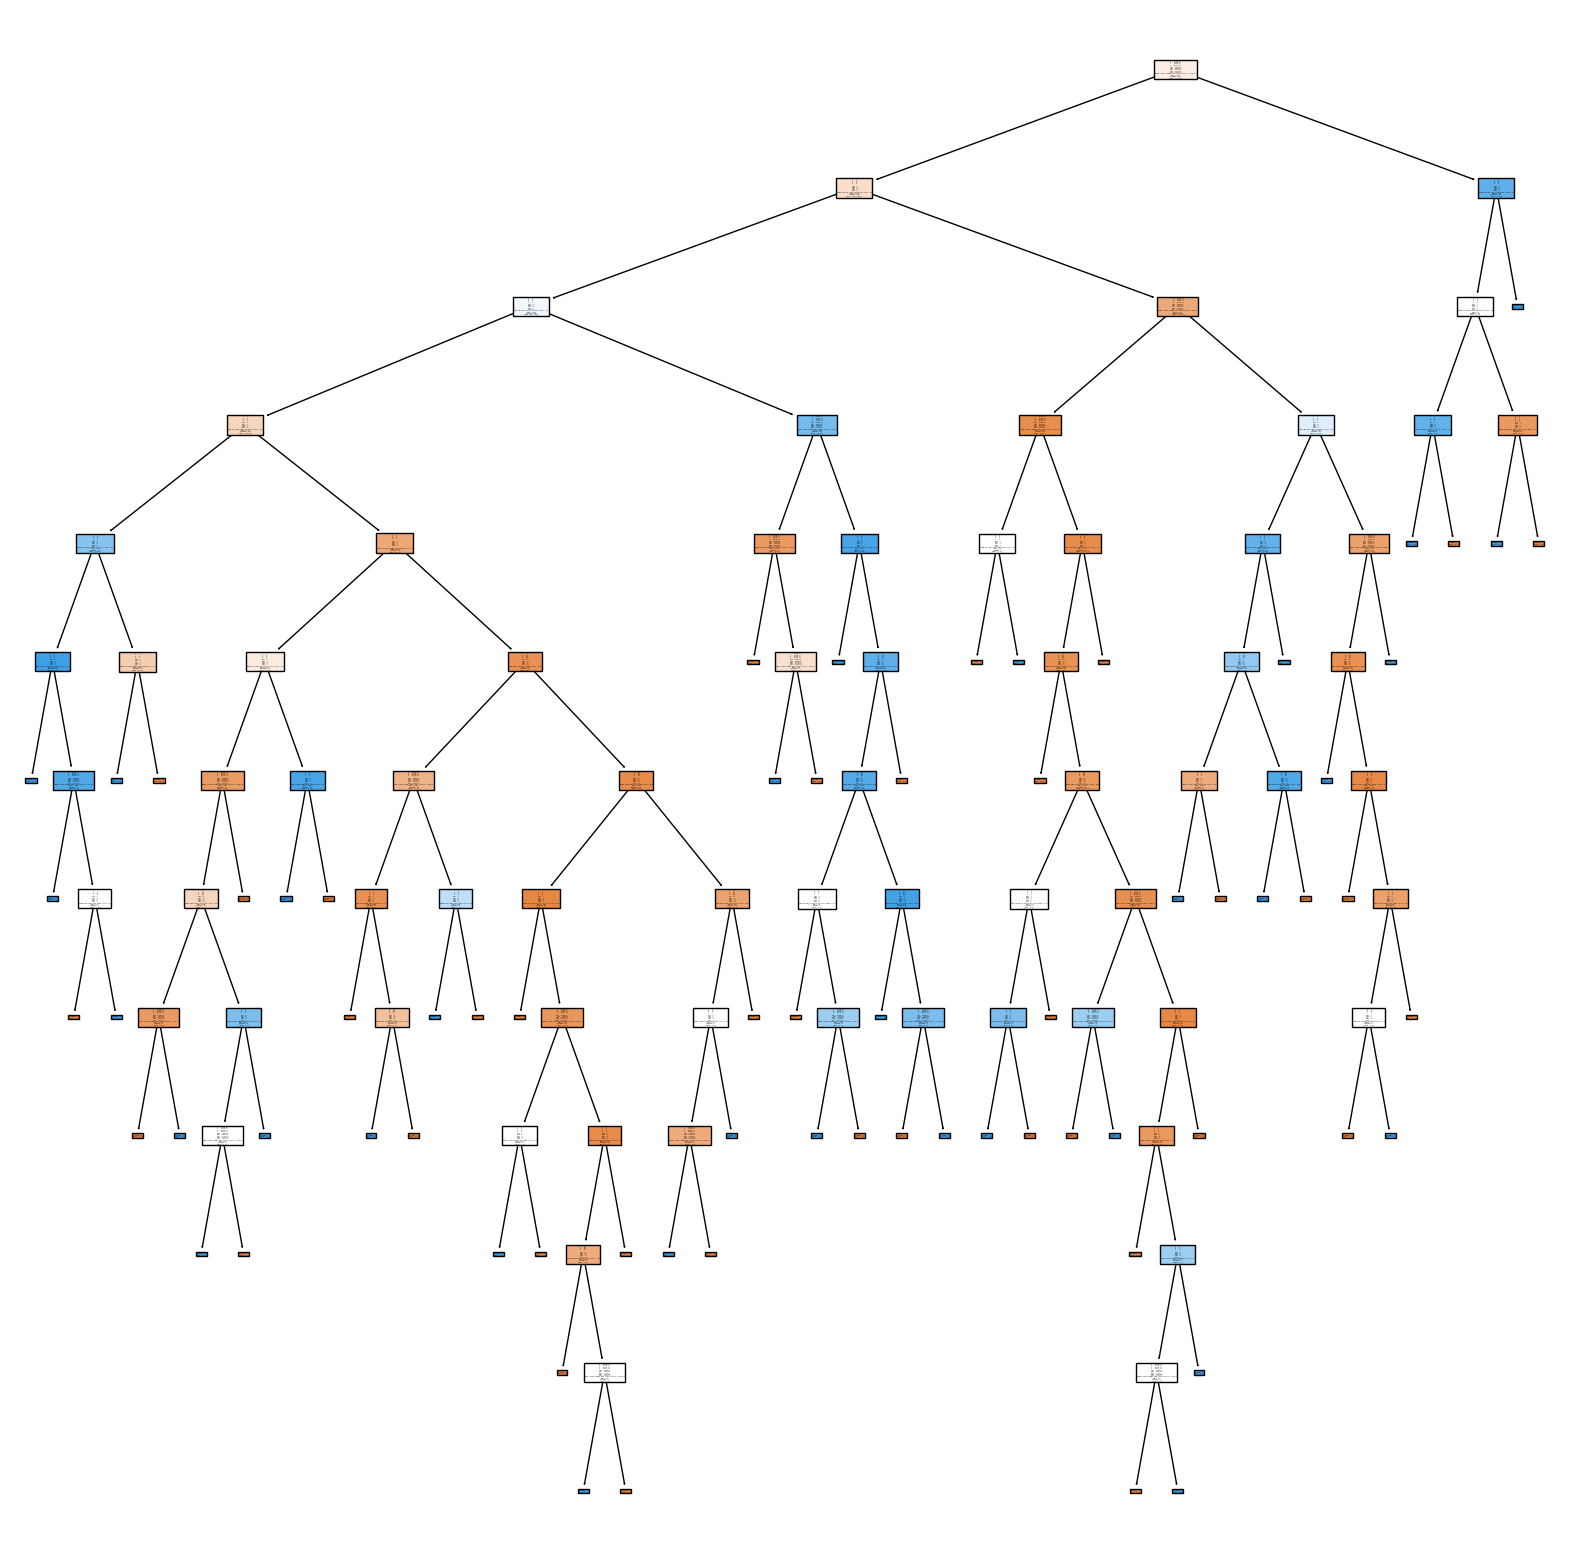

In [137]:
plt.figure(figsize=(20,20))  # Set the size of the figure
plot_tree(tree, filled=True,feature_names=[x["age"],x["sex"],x["region"],x["income"],x["married"],x["children"],x["car"],x["save_act"],x["current_act"],x["mortgage"]])
plt.show()

In [138]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8555555555555555


Hyper Tuning

Text(0.5, 1.0, 'Accuracy vs. Max Depth')

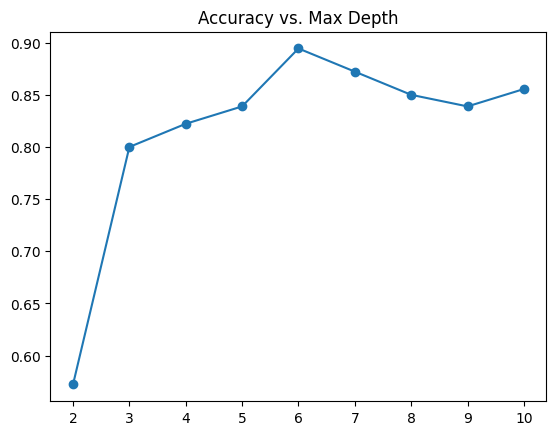

In [139]:
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_values = []
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.plot(max_depth_values, accuracy_values, marker='o')
plt.title('Accuracy vs. Max Depth')

In [140]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


Text(0.5, 1.0, 'Accuracy vs. Max Depth')

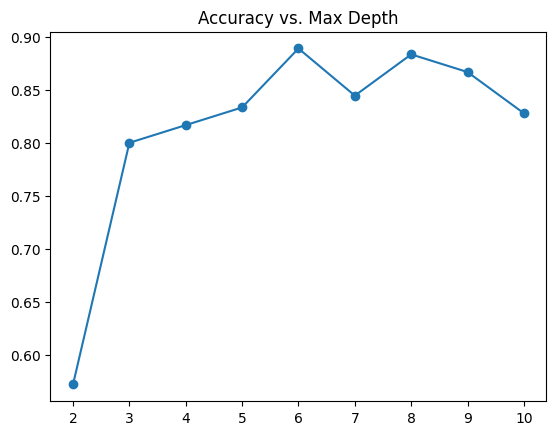

In [141]:
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_values = []
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion="gini", max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.plot(max_depth_values, accuracy_values, marker='o')
plt.title('Accuracy vs. Max Depth')

In [142]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8833333333333333


# KNN

Predicting and initializing KNN then fit data and train

0.5777777777777777


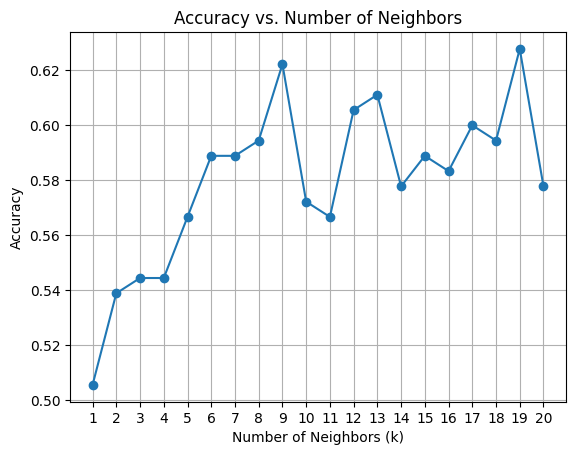

In [143]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

k_values = range(1, 21)  # Range of k values
accuracies = []  # List to store accuracies

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(accuracy)
# Plotting the accuracies
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [144]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)

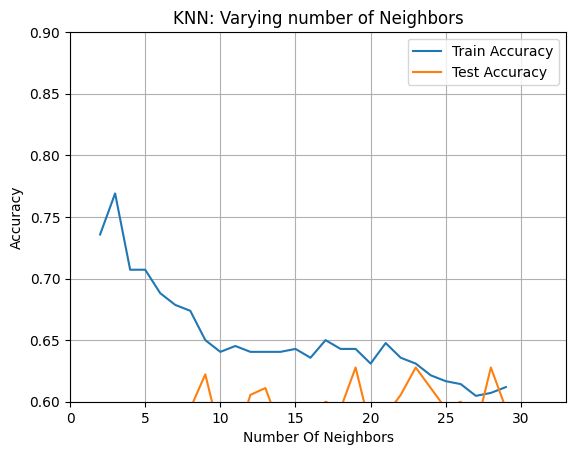

In [145]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

In [146]:
for key, value in test_score.items():
    if value==max(test_score.values()):
        print(key)

19
23
28


In [147]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 14}


In [148]:
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy_score=accuracy_score(y_test, y_pred)*100
print("Accuracy for testing dataset after tuning : {:.2f}%".format(accuracy_score))

Accuracy for testing dataset after tuning : 57.78%


Predicting and initializing Guassian then fit data and train

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

TypeError: 'float' object is not callable

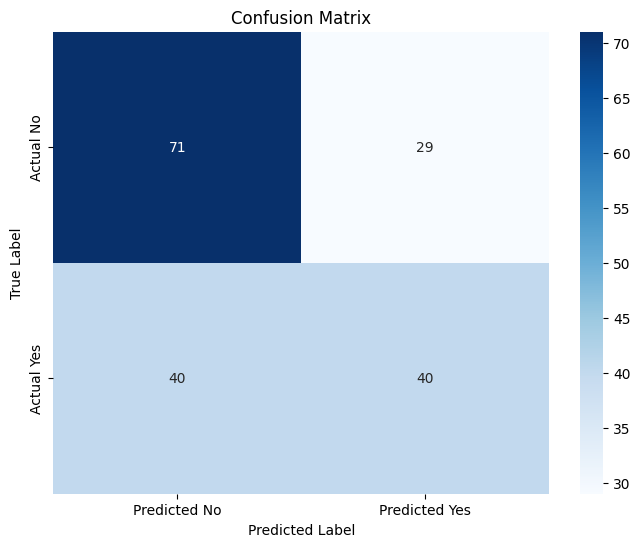

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Predicting and initializing BernoulliNB then fit data and train

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6111111111111112


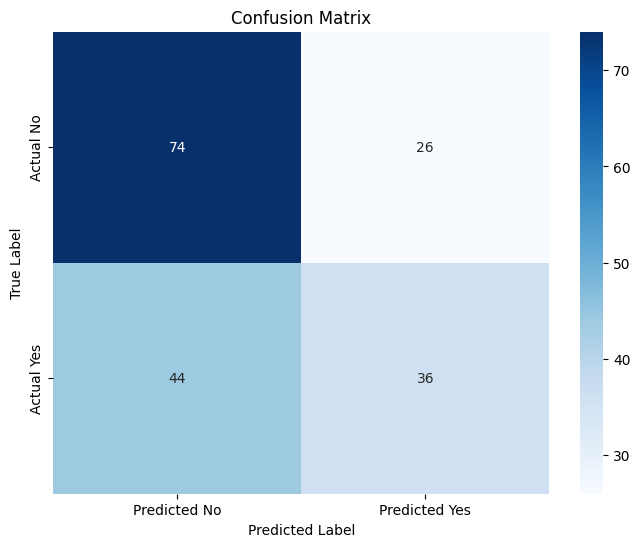

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Predicting and initializing MultinomialNB then fit data and train

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6055555555555555


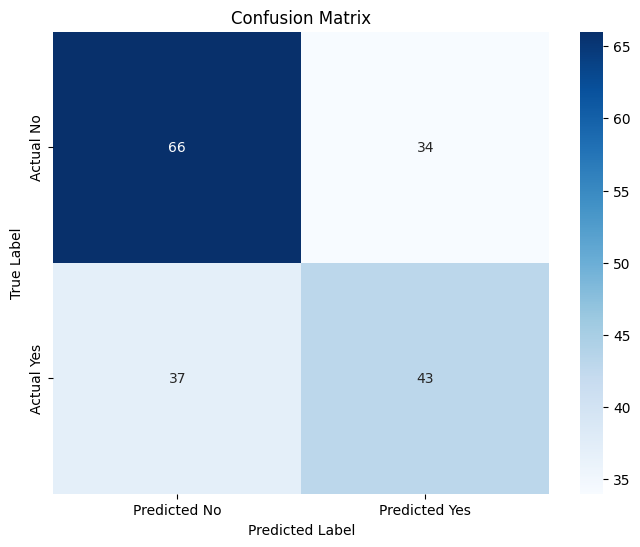

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Predicting and initializing LogisticRegression then fit data and train

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.55


c:\Users\ChissanuPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


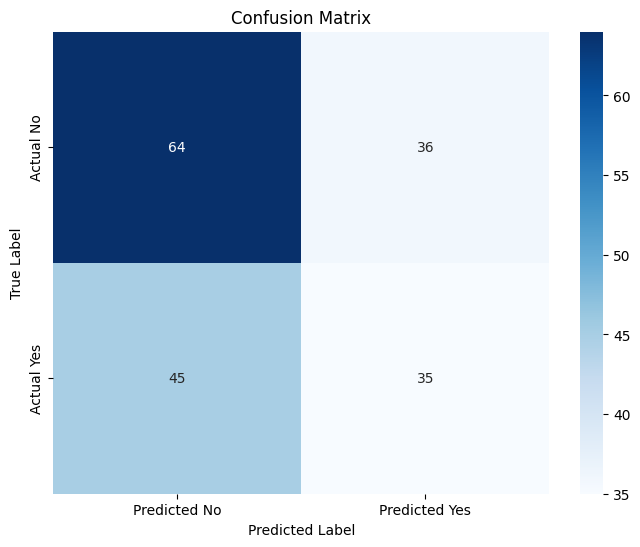

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()